# How To Implement The Perceptron Algorithm From Scratch In Python

Основано на статье "How To Implement The Perceptron Algorithm From Scratch In Python" https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/ 

After completing this tutorial, you will know:
*    How to train the network weights for the Perceptron.
*    How to make predictions with the Perceptron.
*    How to implement the Perceptron algorithm for a real-world classification problem.


In [2]:
import matplotlib.pyplot as plt

## 1. Making Predictions

In [3]:
# Make a prediction with weights
def predict(row, weights):
	activation = weights[0] 
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i] # activation = (0.206 * X1) + (-0.234 * X2) + -0.1
	return 1.0 if activation >= 0.0 else 0.0

# test predictions
dataset = [[1.38807019,1.850220317,0],
    [1.465489372,2.362125076,0],
    [2.7810836,2.550537003,0],	
	[3.396561688,4.400293529,0],
	[3.06407232,3.005305973,0],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[7.627531214,2.759262235,1],
	[7.673756466,3.508563011,1],
	[8.675418651,-0.242068655,1]]

weights = [-0.1, 0.20653640140000007, -0.23418117710000003]

for row in dataset:
	prediction = predict(row, weights)
	print("Expected=%d, Predicted=%d" % (row[-1], prediction))

Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1


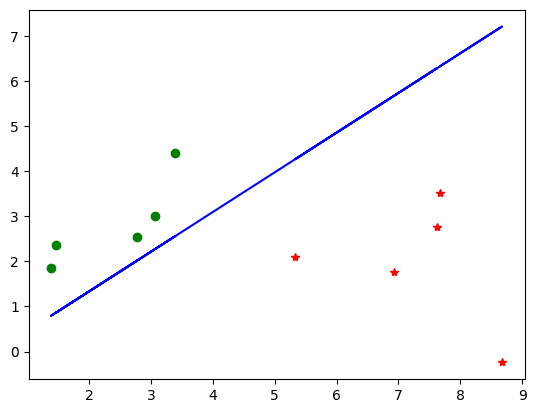

In [18]:
x1 = []
x2 = []
y1 = []
y2 = []
for i in dataset:
    if i[2]:
        x1.append(i[0])
        y1.append(i[1])
    else:
        x2.append(i[0])
        y2.append(i[1])


plt.plot(x1,y1, 'r*')
plt.plot(x2,y2, 'go')
x = x2+x1
# разделяющая линия - это решение уравнения -0.1 + 0.206*x - 0.234*y = 0, то есть  y = (-0.1 + 0.206*x)/0.234
plt.plot(x, [(-0.1 + 0.206*i)/0.234 for i in x], color='blue' )
plt.show()

# 2. Training Network Weights

For the Perceptron algorithm, each iteration the weights (w) are updated using the equation:

w = w + learning_rate * (expected - predicted) * x

Where w is weight being optimized, learning_rate is a learning rate that you must configure (e.g. 0.01), 
(expected – predicted) is the prediction error for the model on the training data attributed to the weight and x is the input value.

>epoch=0, sum_error=2.000, weights=[0.0, 0.048464476140000004, 0.00208725232]
>epoch=1, sum_error=1.000, weights=[-0.01, 0.020653640140000002, -0.023418117710000002]
>epoch=2, sum_error=0.000, weights=[-0.01, 0.020653640140000002, -0.023418117710000002]
>epoch=3, sum_error=0.000, weights=[-0.01, 0.020653640140000002, -0.023418117710000002]
>epoch=4, sum_error=0.000, weights=[-0.01, 0.020653640140000002, -0.023418117710000002]
>epoch=5, sum_error=0.000, weights=[-0.01, 0.020653640140000002, -0.023418117710000002]
>epoch=6, sum_error=0.000, weights=[-0.01, 0.020653640140000002, -0.023418117710000002]
>epoch=7, sum_error=0.000, weights=[-0.01, 0.020653640140000002, -0.023418117710000002]
>epoch=8, sum_error=0.000, weights=[-0.01, 0.020653640140000002, -0.023418117710000002]
>epoch=9, sum_error=0.000, weights=[-0.01, 0.020653640140000002, -0.023418117710000002]
[-0.01, 0.020653640140000002, -0.023418117710000002]


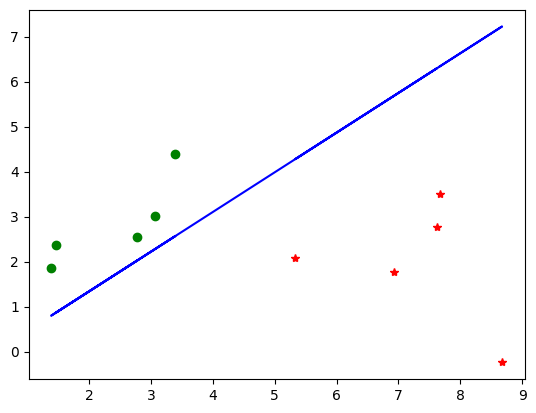

In [51]:
# Make a prediction with weights
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i] # activation = (w1 * X1) + (w2 * X2) + bias
	return 1.0 if activation >= 0.0 else 0.0

# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
	weights = [0 for i in train[0]] # range(len(train[0]))]
	for epoch in range(n_epoch):
		sum_error = 0.0
		for row in train:
			prediction = predict(row, weights)
			error = row[-1] - prediction
			sum_error += error**2
			weights[0] = weights[0] + l_rate * error
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
		if epoch < 10:
			print(f'>{epoch=:d}, {sum_error=:.3f}, {weights=}') 
	return weights

# Calculate weights
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
l_rate = 0.01
n_epoch = 2000
weights = train_weights(dataset, l_rate, n_epoch)
print(weights)

plt.plot(x1,y1, 'r*')
plt.plot(x2,y2, 'go')
x = x2+x1
# разделяющая линия - это решение уравнения -0.1 + 0.206*x - 0.234*y = 0, то есть  y = (-0.1 + 0.206*x)/0.234
plt.plot(x, [(weights[0] + weights[1]*i)/(-weights[2]) for i in x], color='blue' )
plt.show()